In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pickle

In [3]:
IMG_SIZE = 32

#Load prediction model
new_model = tf.keras.models.load_model('/content/drive/My Drive/CSC480CharNN/char_reader.model')

#Load array with categories
pickle_in = open("/content/drive/My Drive/CSC480CharNN/CATEGORIES.pickle", "rb")
CATEGORIES = pickle.load(pickle_in)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#Get an image with a single number and store it as an array

def create_image_array(img_path, image_name):
    filepath = img_path + image_name 
    image_array = []         
    try:
      img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      image_array.append([new_array])
      return image_array
    except Exception as e:
      print("ERROR:", e)
      return(e)

In [0]:
def process_image(image_array):  

  #Convert to list to numpy array
  image_array = np.array(image_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

  #Invert colors to match training input images
  image_array[0,:,:,-1] = np.invert(image_array[0,:,:,-1])

  #Normalize data
  image_array = tf.keras.utils.normalize(image_array, axis=1) 

  plt.imshow(image_array[0][:,:,-1]) 
  plt.show()
  
  return image_array

In [0]:
def get_prediction(image_array):
  pred_distribution = new_model.predict(image_array)
  prediction = CATEGORIES[np.argmax(pred_distribution[0])]
  return pred_distribution, prediction


In [0]:
def get_probability(pred):
  percentage = []
  top5 = np.argsort(pred[0])[::-1][:5]
  for i in range(len(top5)):
    prob = pred[0][top5[i]]
    total = np.sum(pred[0])
    percentage = prob/total * 100
    print(round(percentage, 2), "% - ", CATEGORIES[top5[i]])


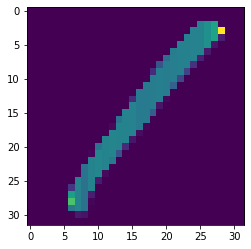

51.81 % -  1
14.81 % -  I
6.14 % -  4
4.44 % -  T
4.34 % -  H


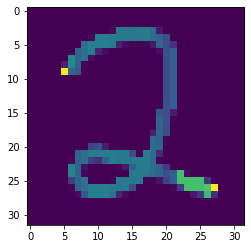

92.77 % -  2
2.78 % -  Z
1.36 % -  D
0.51 % -  J
0.45 % -  U


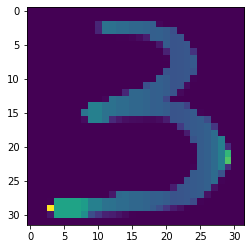

55.93 % -  3
10.1 % -  F
8.43 % -  5
6.58 % -  S
4.19 % -  J


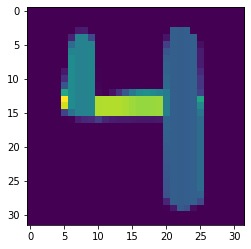

48.23 % -  4
21.43 % -  9
10.15 % -  Y
4.0 % -  T
3.95 % -  F


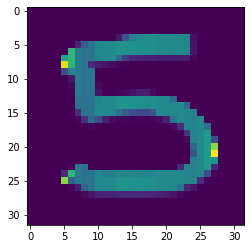

47.27 % -  5
12.46 % -  F
11.73 % -  S
8.64 % -  3
7.95 % -  Z


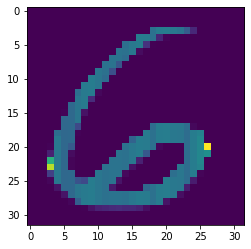

87.46 % -  6
5.38 % -  H
2.98 % -  G
0.74 % -  2
0.72 % -  B


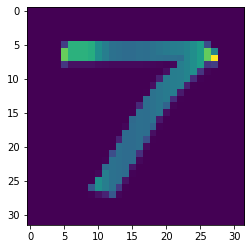

80.02 % -  7
11.92 % -  J
1.66 % -  Z
1.51 % -  P
1.04 % -  Y


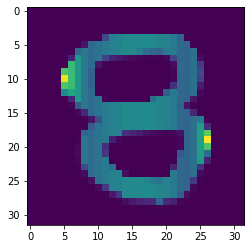

18.48 % -  8
15.51 % -  9
14.07 % -  2
13.89 % -  F
4.09 % -  G


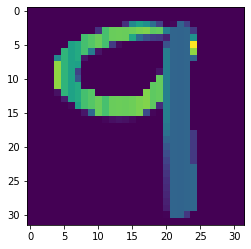

65.58 % -  9
7.49 % -  4
6.43 % -  F
3.62 % -  Y
3.53 % -  P


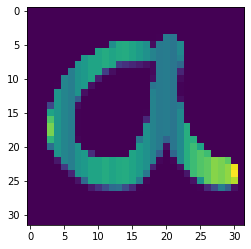

41.44 % -  A
22.66 % -  G
7.14 % -  Q
5.75 % -  2
3.97 % -  J


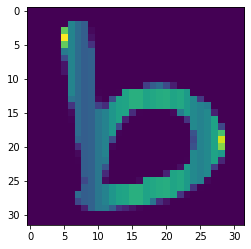

58.35 % -  B
13.1 % -  H
9.02 % -  T
5.96 % -  6
3.64 % -  K


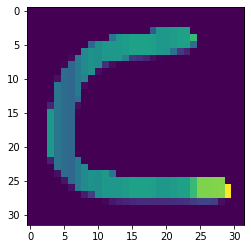

65.8 % -  C
14.74 % -  Z
3.99 % -  5
2.58 % -  L
2.08 % -  G


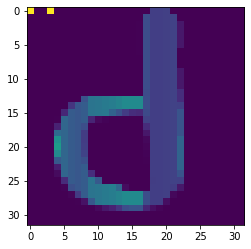

39.59 % -  D
13.63 % -  T
11.2 % -  6
9.46 % -  J
3.5 % -  3


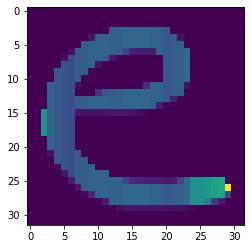

34.22 % -  E
29.51 % -  C
8.52 % -  Z
3.86 % -  Q
3.77 % -  G


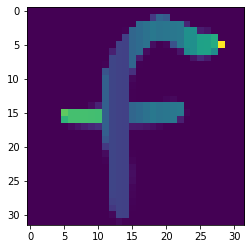

39.81 % -  F
31.75 % -  T
17.95 % -  4
6.69 % -  5
2.45 % -  J


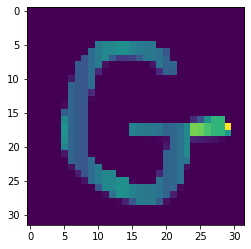

43.94 % -  G
19.23 % -  F
14.33 % -  T
6.75 % -  Z
4.77 % -  C


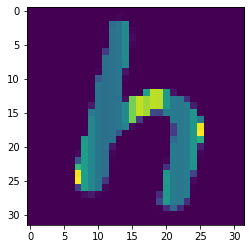

56.28 % -  H
11.18 % -  6
10.96 % -  1
5.07 % -  T
3.38 % -  B


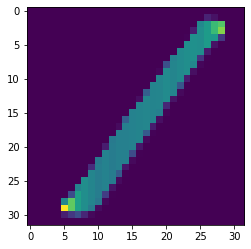

27.92 % -  1
13.08 % -  I
11.37 % -  4
10.19 % -  Y
6.89 % -  T


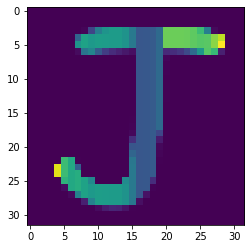

74.83 % -  J
14.98 % -  F
2.31 % -  S
2.01 % -  5
1.29 % -  G


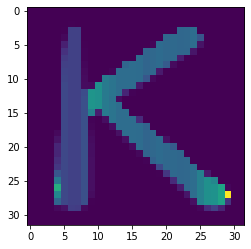

76.73 % -  K
6.95 % -  H
2.79 % -  Q
2.46 % -  X
2.18 % -  4


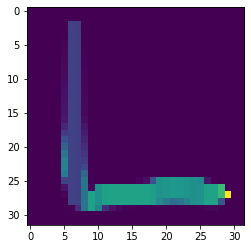

36.63 % -  L
12.99 % -  C
12.12 % -  Z
7.44 % -  T
6.78 % -  K


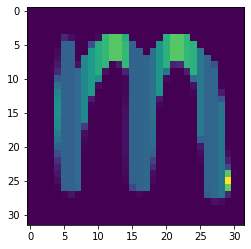

16.18 % -  M
12.3 % -  Y
11.77 % -  V
8.75 % -  P
6.73 % -  4


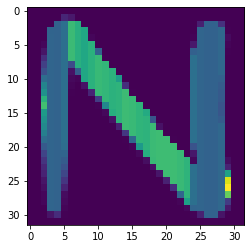

25.03 % -  N
13.7 % -  Y
10.29 % -  W
9.6 % -  X
7.87 % -  M


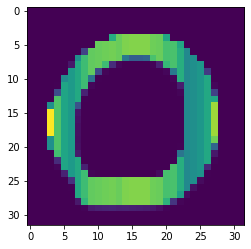

39.33 % -  O
18.15 % -  C
6.13 % -  J
5.1 % -  Q
4.28 % -  A


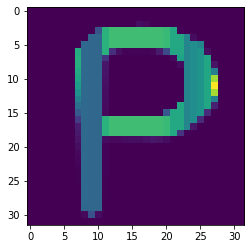

51.18 % -  P
33.63 % -  F
11.75 % -  9
0.55 % -  R
0.46 % -  Q


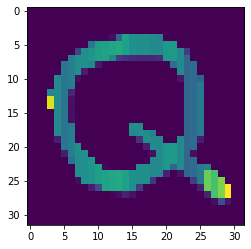

36.79 % -  Q
18.98 % -  2
14.08 % -  A
8.23 % -  G
3.16 % -  9


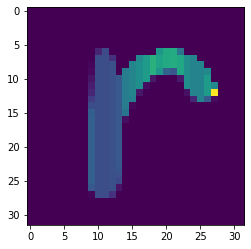

50.44 % -  R
17.72 % -  F
8.73 % -  V
8.49 % -  P
2.96 % -  T


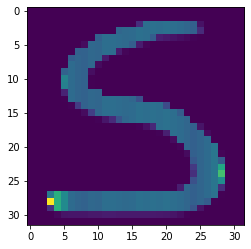

32.89 % -  S
29.65 % -  5
19.75 % -  F
6.7 % -  G
2.68 % -  3


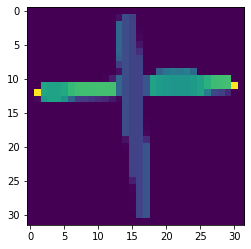

54.23 % -  T
12.4 % -  J
9.46 % -  F
7.97 % -  4
5.45 % -  Z


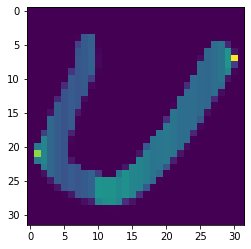

48.33 % -  U
20.6 % -  J
11.38 % -  Y
5.06 % -  V
3.29 % -  W


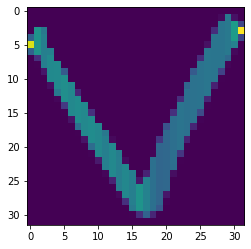

63.05 % -  V
12.78 % -  Y
5.35 % -  W
4.86 % -  U
3.65 % -  R


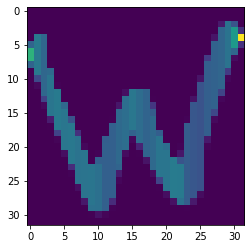

66.55 % -  W
8.55 % -  H
4.66 % -  U
3.3 % -  V
2.71 % -  N


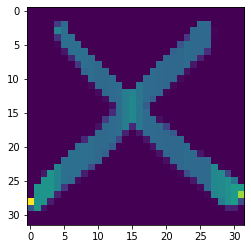

78.63 % -  X
6.3 % -  H
5.49 % -  Y
2.65 % -  K
1.6 % -  Z


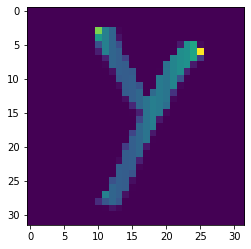

43.62 % -  Y
18.48 % -  4
15.08 % -  V
5.79 % -  X
5.57 % -  T


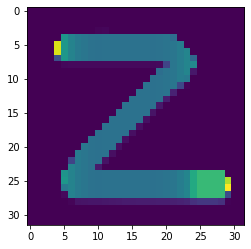

77.51 % -  Z
12.2 % -  2
4.75 % -  7
0.93 % -  T
0.55 % -  P
34 / 35
0.9714285714285714


In [8]:
def main():

  correct = 0

  img_path = "/content/drive/My Drive/CSC480CharNN/singleCharTest/"

  image_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9",
                 "a", "b", "c", "d", "e", "f", "g", "h", "i", 
                 "J", "k", "L", "m", "N", "o", "p", "Q", "r",
                 "s", "t", "u", "v", "W", "x", "y", "z"]

  for i in range(len(image_names)):
    image_array = create_image_array(img_path, image_names[i]+".jpg")
    new_image_array = process_image(image_array)
    pred_distribution, prediction = get_prediction(new_image_array)
    get_probability(pred_distribution)

    input_value = image_names[i]
    if (input_value.isalpha()):
      input_value = input_value.upper()
    if (prediction == input_value):
      correct += 1

  correctly_predicted = correct / len(image_names)
  print (correct, "/", len(image_names))
  print (correctly_predicted)


main()

In [0]:
#Final Model Stats
#Batch size: 512
#Validation split: .1

#1 epoch: 25/35
#loss: 0.7932 - acc: 0.7721 - val_loss: 0.3668 - val_acc: 0.8880

#2 epochs: 21/35
#loss: 0.2920 - acc: 0.9067 - val_loss: 0.2739 - val_acc: 0.9125

#3 epochs: 34/35
#loss: 0.2425 - acc: 0.9216 - val_loss: 0.2382 - val_acc: 0.9233

#4 epochs: 24/35
#loss: 0.2123 - acc: 0.9302 - val_loss: 0.2302 - val_acc: 0.9250

#5 epochs: 27/35
#loss: 0.1980 - acc: 0.9344 - val_loss: 0.2105 - val_acc: 0.9305

#6 epochs: 23/35
#loss: 0.1811 - acc: 0.9399 - val_loss: 0.1943 - val_acc: 0.9354

#7 epochs: 13/35
#loss: 0.1666 - acc: 0.9439 - val_loss: 0.1915 - val_acc: 0.9377

#8 epochs: 21/35
#loss: loss: 0.1569 - acc: 0.9469 - val_loss: 0.1869 - val_acc: 0.9384
